In [54]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os
from itertools import groupby
import datetime as dt

#visualizing results
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#import yellowbrick as yb

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

In [66]:
#read in task df

path_task = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Behavior/Med boxes/progressive_ratio/PR_task.csv'
    
task = pd.read_csv(path_task, index_col=0)
task = pd.DataFrame(data = task)

print(task.shape)

task.head(10)

(456, 15)


,date,animal_number,session,trial_num,reinforcement_count,right_lever_press_count,right_lever_press_latency_1st,right_lever_press_latency_ave_bit,left_lever_press_count,left_lever_press_latency_1st,left_lever_press_latency_ave_bit,HE_trial_count,HE_trial_latency_1st,HE_trial_latency_ave_bit,trial_times
0,190807,683,PR_1,0,1,0,0.0,0.0,1,2.26,2.260000,1,0.07,0.070000,2.27
1,190807,683,PR_1,1,1,0,0.0,0.0,2,19.56,20.550000,3,2.20,5.356667,21.55
2,190807,683,PR_1,2,1,0,0.0,0.0,2,14.75,15.055000,4,5.25,8.747500,15.37
3,190807,683,PR_1,3,1,0,0.0,0.0,3,8.77,9.906667,1,10.77,10.770000,11.66
4,190807,683,PR_1,4,1,0,0.0,0.0,4,52.41,55.610000,6,2.29,36.990000,59.47
5,190807,683,PR_1,5,1,0,0.0,0.0,6,7.62,27.160000,15,5.43,37.582667,77.33
6,190807,683,PR_1,6,1,0,0.0,0.0,8,6.02,13.506250,8,8.29,15.078750,21.72
7,190807,683,PR_1,7,1,0,0.0,0.0,11,10.00,18.650909,8,2.38,15.840000,23.81
8,190807,683,PR_1,8,1,0,0.0,0.0,16,7.27,14.709375,7,6.22,11.454286,23.60
9,190807,683,PR_1,9,1,0,0.0,0.0,23,1.38,14.518696,12,0.64,7.664167,29.45


In [67]:
path_animal_info = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Analysis/Excel files/Med boxes/PR_round1.xlsx'

animal_info = pd.read_excel(path_animal_info)
animal_info = pd.DataFrame(data = animal_info)

animal_info.rename(columns={"animal": "animal_number"}, inplace=True)
print(animal_info.shape)

animal_info.head()

(17, 4)


,animal_number,lever,cage,group
0,683,2,1,2
1,684,2,2,1
2,685,2,2,1
3,686,1,2,1
4,687,2,3,1


In [68]:
df_final = (task.merge(animal_info,
                on=['animal_number'], how='left'))
df_final.head()

,date,animal_number,session,trial_num,reinforcement_count,right_lever_press_count,right_lever_press_latency_1st,right_lever_press_latency_ave_bit,left_lever_press_count,left_lever_press_latency_1st,left_lever_press_latency_ave_bit,HE_trial_count,HE_trial_latency_1st,HE_trial_latency_ave_bit,trial_times,lever,cage,group
0,190807,683,PR_1,0,1,0,0.0,0.0,1,2.26,2.260000,1,0.07,0.070000,2.27,2,1,2
1,190807,683,PR_1,1,1,0,0.0,0.0,2,19.56,20.550000,3,2.20,5.356667,21.55,2,1,2
2,190807,683,PR_1,2,1,0,0.0,0.0,2,14.75,15.055000,4,5.25,8.747500,15.37,2,1,2
3,190807,683,PR_1,3,1,0,0.0,0.0,3,8.77,9.906667,1,10.77,10.770000,11.66,2,1,2
4,190807,683,PR_1,4,1,0,0.0,0.0,4,52.41,55.610000,6,2.29,36.990000,59.47,2,1,2


In [69]:
df_final.groupby(['session', 'group']).mean()

date  animal_number  trial_num  reinforcement_count  right_lever_press_count  right_lever_press_latency_1st  right_lever_press_latency_ave_bit  left_lever_press_count  left_lever_press_latency_1st  left_lever_press_latency_ave_bit  HE_trial_count  HE_trial_latency_1st  HE_trial_latency_ave_bit  trial_times     lever      cage
session group                                                                                                                                                                                                                                                                                                                                                  
PR_1    1      190807.105263     688.909774   7.120301                  1.0                11.548872                      11.841278                          48.424442               26.744361                     24.809549                         65.648113       18.308271             14.893910                 95.780013   195.039323  1.578947  3.300752
        2      190807.121495     693.364486   6.364486                  1.0                 4.345794                      24.828318                          62.654245               20.579439                     16.735234                         60.528903       19.757009             17.531963                 90.923204   198.533645  1.682243  4.822430
PR_2    1      190808.080000     688.632000   6.944000                  1.0                20.504000                      36.041920                          86.529482               26.920000                     14.218240                         58.446744       13.744000             18.912960                 99.924508   199.977600  1.584000  3.192000
        2      190808.164835     693.175824   5.956044                  1.0                 6.000000                      35.745604                          77.492972               27.186813                     40.171319                         90.273676       16.329670             22.494505                105.485776   226.796484  1.681319  4.736264

In [70]:
df_final.columns.values

array(['date', 'animal_number', 'session', 'trial_num',
       'reinforcement_count', 'right_lever_press_count',
       'right_lever_press_latency_1st',
       'right_lever_press_latency_ave_bit', 'left_lever_press_count',
       'left_lever_press_latency_1st', 'left_lever_press_latency_ave_bit',
       'HE_trial_count', 'HE_trial_latency_1st',
       'HE_trial_latency_ave_bit', 'trial_times', 'lever', 'cage',
       'group'], dtype=object)

In [71]:
#make new df with combined data

pr_df_session = pd.DataFrame()

animals = df_final['animal_number'].unique()

for animal in animals:
    
    #get animal data
    animal_data = df_final[df_final['animal_number'] == animal]
    
    #generate session df
    sessions = animal_data['session'].unique()
    
    for session in sessions:
        #get session data for animal
        animal_data_session = animal_data[animal_data['session'] == session]
        
        #compute and fill session data
        if animal_data_session['lever'].unique() == 1:
            animal_data_session['lever_press_count'] = animal_data_session['right_lever_press_count']
            animal_data_session['lever_press_latency_1st'] = animal_data_session['right_lever_press_latency_1st']
            animal_data_session['lever_press_latency_ave'] = animal_data_session['right_lever_press_latency_ave_bit']

        elif animal_data_session['lever'].unique() == 2:
            animal_data_session['lever_press_count'] = animal_data_session['left_lever_press_count']
            animal_data_session['lever_press_latency_1st'] = animal_data_session['left_lever_press_latency_1st']
            animal_data_session['lever_press_latency_ave'] = animal_data_session['left_lever_press_latency_ave_bit']
            
        pr_df_session = pr_df_session.append(animal_data_session)
        
pr_df_session.reset_index(inplace=True, drop=True)    
pr_df_session = pr_df_session[['date', 'animal_number', 'lever', 'cage', 'group', 'session', 'trial_num',
       'reinforcement_count', 'trial_times',
       'HE_trial_count', 'HE_trial_latency_1st',
       'HE_trial_latency_ave_bit',
       'lever_press_count', 'lever_press_latency_1st',
       'lever_press_latency_ave']]
pr_df_session.head()

,date,animal_number,lever,cage,group,session,trial_num,reinforcement_count,trial_times,HE_trial_count,HE_trial_latency_1st,HE_trial_latency_ave_bit,lever_press_count,lever_press_latency_1st,lever_press_latency_ave
0,190807,683,2,1,2,PR_1,0,1,2.27,1,0.07,0.070000,1,2.26,2.260000
1,190807,683,2,1,2,PR_1,1,1,21.55,3,2.20,5.356667,2,19.56,20.550000
2,190807,683,2,1,2,PR_1,2,1,15.37,4,5.25,8.747500,2,14.75,15.055000
3,190807,683,2,1,2,PR_1,3,1,11.66,1,10.77,10.770000,3,8.77,9.906667
4,190807,683,2,1,2,PR_1,4,1,59.47,6,2.29,36.990000,4,52.41,55.610000


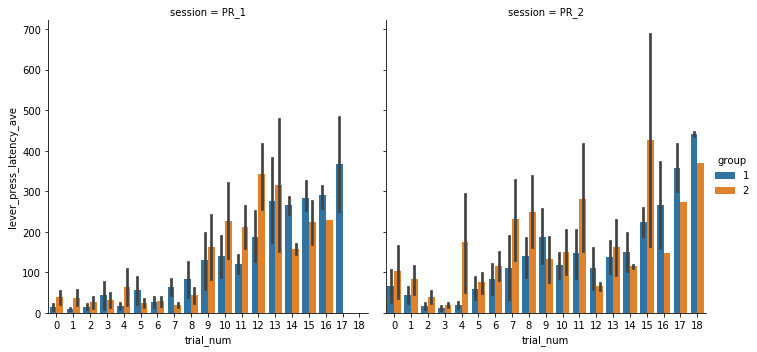

In [78]:
sns.catplot(x='trial_num', y='lever_press_latency_ave', data=pr_df_session, hue='group', ci=68, col='session', kind='bar')

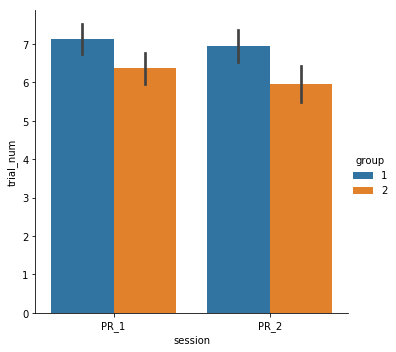

In [64]:
sns.catplot(x='session', y='trial_num', data=pr_df_session, hue='group', ci=68, kind='bar')

In [39]:
choice_df = pd_df_session[pd_df_session['sub_session'] == 'choice']
choice_df = choice_df.drop(['date', 'cage', 'sub_session'], axis=1)
choice_df.set_index(['animal_number', 'group', 'session'], inplace=True)
choice_df.head()

high_reward_lever  reinforcement_count  high_reward_lever_count  high_reward_lever_latency_ave  low_reward_lever_count  low_reward_lever_latency_ave  high_reward_prob
animal_number group session                                                                                                                                                                       
683           2     100                 right                   35                       12                       0.659130                      11                      1.106522         52.173913
                    75                  right                   27                       11                       0.617917                      13                      1.538750         45.833333
                    50                  right                   24                        2                       0.096667                      22                      1.525417          8.333333
                    25                  right                   23                        4                       0.532609                      19                      1.081304         17.391304
                    0                   right                    3                        3                       0.203636                      19                      1.105455         13.636364

In [40]:
choice_df = choice_df.unstack(-1)
choice_df.head()

high_reward_lever                             reinforcement_count                 high_reward_lever_count                 high_reward_lever_latency_ave                                         low_reward_lever_count                 low_reward_lever_latency_ave                                         high_reward_prob                                             
session                           0      25     50     75     100                 0   25  50  75  100                     0   25  50  75  100                           0         25        50        75        100                    0   25  50  75  100                          0         25        50        75        100              0          25         50          75         100
animal_number group                                                                                                                                                                                                                                                                                                                                                                          
683           2                 right  right  right  right  right                   3  23  24  27  35                       3   4   2  11  12                      0.203636  0.532609  0.096667  0.617917  0.659130                     19  19  22  13  11                     1.105455  1.081304  1.525417  1.538750  1.106522        13.636364  17.391304   8.333333   45.833333  52.173913
684           1                  left   left   left   left   left                   7  23  25  27  46                       7   5  11  11  22                      0.368750  0.483750  1.328750  1.032273  2.540417                     17  19  13  11   2                     1.073750  2.042917  2.235000  1.722273  0.123750        29.166667  20.833333  45.833333   50.000000  91.666667
685           1                  left   left   left   left   left                  23  13  25  40  45                      23  23  23  24  22                      1.201250  1.463333  1.452917  1.502083  2.083913                      1   1   1   0   1                     0.160000  0.065417  0.064167  0.000000  0.370000        95.833333  95.833333  95.833333  100.000000  95.652174
686           1                  left   left   left   left   left                   2  24  26  31  43                       2   0   8   9  19                      0.202917  0.000000  0.630000  0.756250  2.392500                     22  24  16  15   5                     1.572500  1.835000  1.193750  1.155833  0.635417         8.333333   0.000000  33.333333   37.500000  79.166667
689           1                  left   left   left   left   left                  21  11  17  28  42                      21  17  15  17  18                      1.597619  1.287778  1.148889  1.605238  1.898750                      0   1   3   4   6                     0.000000  0.116667  0.421111  0.585238  0.744583       100.000000  94.444444  83.333333   80.952381  75.000000

In [41]:
choice_df.to_csv('choice_df.csv')